In [1]:
#Import Libraries
# Import packages needed for the lab
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression,  LinearRegression, Lasso, Ridge
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.signal import butter, filtfilt
from scipy.signal import find_peaks
from sklearn.svm import SVC 

df = pd.read_csv('Project_Data_EE4C12_S&S_EMG.csv', delimiter=',') 
df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


In [2]:
f_data1 = df[(df['class'] != 0)]
f_data2 = f_data1[(f_data1['class'] != 7)]
df = f_data2


x = df.drop(['time'],axis='columns')
y = df['class']
time = df['time']
col1 = df['channel1']
print(x)
print(y.unique())

         channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
2287     -0.00001   0.00000  -0.00001   0.00000   0.00000  -0.00001  -0.00001   
2288     -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001  -0.00003   
2289     -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001  -0.00003   
2290     -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001  -0.00003   
2291     -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001  -0.00003   
...           ...       ...       ...       ...       ...       ...       ...   
4237207   0.00009   0.00001   0.00003   0.00001  -0.00003  -0.00008   0.00004   
4237208   0.00009   0.00001   0.00003   0.00001  -0.00003  -0.00008   0.00004   
4237209   0.00009   0.00001   0.00003   0.00001  -0.00003  -0.00008   0.00004   
4237210   0.00014   0.00003  -0.00001   0.00001  -0.00012   0.00006  -0.00007   
4237211   0.00014   0.00003  -0.00001   0.00001  -0.00012   0.00006  -0.00007   

         channel8  class  l

In [3]:
class_mapping = {
    0: 'unmarked data',
    1: 'hand at rest',
    2: 'hand clenched in a fist',
    3: 'wrist flexion',
    4: 'wrist extension',
    5: 'radial deviations',
    6: 'ulnar deviations',
    7: 'extended palm'
}

y_mc = np.vectorize(class_mapping.get)(y)
print(y_mc)

y_mc_series = pd.Series(y_mc)

# Get the unique class labels and their counts
class_counts = y_mc_series.value_counts()

# Display the number of unique classes and their counts
print("Number of unique classes:", y_mc_series.nunique())
print("\nClass counts:\n", class_counts)

['hand at rest' 'hand at rest' 'hand at rest' ... 'ulnar deviations'
 'ulnar deviations' 'ulnar deviations']
Number of unique classes: 6

Class counts:
 ulnar deviations           253009
radial deviations          251733
wrist extension            251570
hand at rest               250055
wrist flexion              249494
hand clenched in a fist    243193
Name: count, dtype: int64


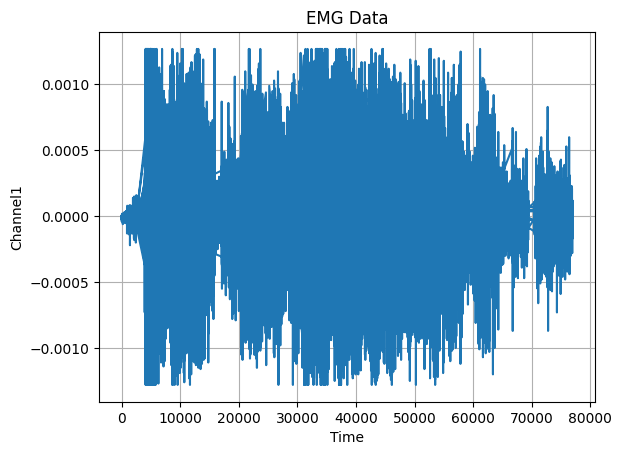

In [4]:
plt.plot(time, col1)
plt.xlabel('Time')
plt.ylabel('Channel1')
plt.title('EMG Data')
plt.grid(True)
plt.show()

In [5]:
dataset = x.groupby(['label','class'])
dataset.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
...,...,...,...,...,...,...,...,...,...,...
4159731,-0.00011,0.00006,0.00002,0.00009,0.00029,-0.00007,-0.00006,-0.00003,6,36
4159732,-0.00014,-0.00007,-0.00009,-0.00009,-0.00004,0.00002,0.00038,0.00048,6,36
4159733,-0.00014,-0.00007,-0.00009,-0.00009,-0.00004,0.00002,0.00038,0.00048,6,36
4159734,-0.00014,-0.00007,-0.00009,-0.00009,-0.00004,0.00002,0.00038,0.00048,6,36


In [6]:
# Functions for extracting sEMG features
# Extract the root mean square
def rms(data): 
      return  np.sqrt(np.mean(data**2,axis=0))  
# Extract Simple Square Integral
def SSI(data): 
    return np.sum(data**2,axis=0)
# Extract the absolute differential signal
def abs_diffs_signal(data): 
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)
# function for returning an estimator class name 
def print_estimator_name(estimator):
    return estimator.__class__.__name__
##tabulating the aggregated sEMG features
dataset=dataset.agg(['min','max',rms,SSI,abs_diffs_signal,np.ptp])
dataset=dataset.reset_index()

print(dataset)

    label class channel1                                                \
                     min      max       rms       SSI abs_diffs_signal   
0       1     1 -0.00005  0.00004  0.000017  0.000002          0.01070   
1       1     2 -0.00111  0.00095  0.000210  0.000301          0.16819   
2       1     3 -0.00087  0.00112  0.000188  0.000260          0.14544   
3       1     4 -0.00020  0.00016  0.000056  0.000022          0.03609   
4       1     5 -0.00031  0.00061  0.000066  0.000030          0.04939   
..    ...   ...      ...      ...       ...       ...              ...   
211    36     2 -0.00128  0.00119  0.000360  0.000788          0.28640   
212    36     3 -0.00077  0.00067  0.000183  0.000204          0.13963   
213    36     4 -0.00014  0.00017  0.000050  0.000015          0.03460   
214    36     5 -0.00059  0.00042  0.000126  0.000091          0.08415   
215    36     6 -0.00047  0.00045  0.000110  0.000073          0.07699   

             channel2           ...  

In [7]:
df = pd.read_csv('Project_Data_EE4C12_S&S_EMG.csv')
dropped_column = df['time']
dataset['time'] = dropped_column
dataset

label class channel1                                                \
                     min      max       rms       SSI abs_diffs_signal   
0       1     1 -0.00005  0.00004  0.000017  0.000002          0.01070   
1       1     2 -0.00111  0.00095  0.000210  0.000301          0.16819   
2       1     3 -0.00087  0.00112  0.000188  0.000260          0.14544   
3       1     4 -0.00020  0.00016  0.000056  0.000022          0.03609   
4       1     5 -0.00031  0.00061  0.000066  0.000030          0.04939   
..    ...   ...      ...      ...       ...       ...              ...   
211    36     2 -0.00128  0.00119  0.000360  0.000788          0.28640   
212    36     3 -0.00077  0.00067  0.000183  0.000204          0.13963   
213    36     4 -0.00014  0.00017  0.000050  0.000015          0.03460   
214    36     5 -0.00059  0.00042  0.000126  0.000091          0.08415   
215    36     6 -0.00047  0.00045  0.000110  0.000073          0.07699   

             channel2           ...  channel7                            \
         ptp      min      max  ...       SSI abs_diffs_signal      ptp   
0    0.00009 -0.00010  0.00007  ...  0.000001          0.00870  0.00006   
1    0.00206 -0.00047  0.00041  ...  0.000318          0.16251  0.00153   
2    0.00199 -0.00113  0.00127  ...  0.000044          0.05866  0.00063   
3    0.00036 -0.00038  0.00024  ...  0.000095          0.07517  0.00090   
4    0.00092 -0.00066  0.00035  ...  0.000049          0.06768  0.00055   
..       ...      ...      ...  ...       ...              ...      ...   
211  0.00247 -0.00026  0.00031  ...  0.000326          0.16129  0.00151   
212  0.00144 -0.00047  0.00029  ...  0.000032          0.05349  0.00054   
213  0.00031 -0.00020  0.00022  ...  0.000042          0.06119  0.00062   
214  0.00101 -0.00051  0.00035  ...  0.000008          0.02587  0.00027   
215  0.00092 -0.00030  0.00029  ...  0.000062          0.07697  0.00078   

    channel8                                                        time  
         min      max       rms       SSI abs_diffs_signal      ptp       
0   -0.00005  0.00002  0.000014  0.000001          0.00921  0.00007    1  
1   -0.00070  0.00054  0.000150  0.000153          0.11696  0.00124    5  
2   -0.00073  0.00051  0.000161  0.000190          0.11869  0.00124    6  
3   -0.00032  0.00026  0.000083  0.000047          0.04984  0.00058    7  
4   -0.00030  0.00045  0.000060  0.000025          0.04606  0.00075    8  
..       ...      ...       ...       ...              ...      ...  ...  
211 -0.00071  0.00063  0.000187  0.000214          0.13880  0.00134  233  
212 -0.00032  0.00040  0.000091  0.000050          0.06638  0.00072  234  
213 -0.00016  0.00019  0.000055  0.000018          0.03878  0.00035  235  
214 -0.00014  0.00010  0.000031  0.000006          0.02195  0.00024  236  
215 -0.00050  0.00048  0.000124  0.000093          0.09120  0.00098  239  

[216 rows x 51 columns]

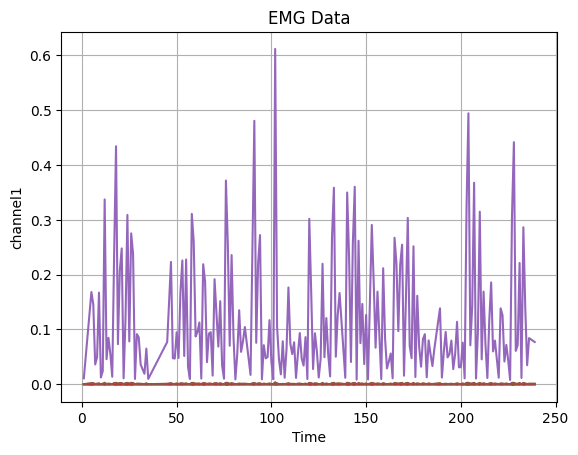

In [8]:
# draw the graph of the preprocessed data
time = dataset['time']
emg = dataset['channel1']
plt.plot(time, emg)
plt.xlabel('Time')
plt.ylabel('channel1')
plt.title('EMG Data')
plt.grid(True)
plt.show()

In [9]:
dataset = dataset.drop(['time'], axis='columns')
temp2=dataset
estimators=[]
accuracy=[]
f1_macro=[]
svc=SVC(C=100,kernel='poly',gamma=1,decision_function_shape='ovo',max_iter=1000)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]

C:\Users\siddh\AppData\Local\Temp\ipykernel_21936\1903610499.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dataset = dataset.drop(['time'], axis='columns')
C:\Users\siddh\AppData\Local\Temp\ipykernel_21936\1903610499.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


In [10]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(x, y_mc ,test_size=0.25,random_state=4720)

In [11]:
mean = X_train_mc.mean(axis=0)
std = X_train_mc.std(axis=0)
X_train_mc -= mean
X_train_mc /= std
X_test_mc -= mean
X_test_mc /= std

In [12]:
svc.fit(X_train_mc,y_train_mc)

c:\Users\siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='poly', max_iter=1000)

0.9514142459479222
[[62238     0     0     0     0     0]
 [    0 60903     0     0     0     0]
 [    0     0 62942     0     0     0]
 [    0     0   177 63093     0     0]
 [    0     0   119     0 45545 17481]
 [    0   147     4     0    20 62095]]
0.9521085269663041


<Figure size 300x300 with 0 Axes>

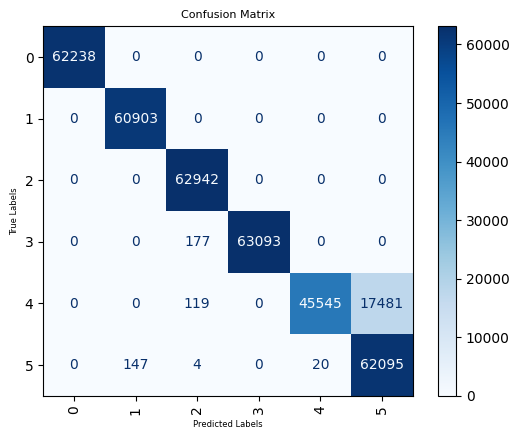

In [13]:
# save the model predection result in y_test_pred
y_test_pred=svc.predict(X_test_mc)
# save the f1_score that used y_test and y_pred in y
y=f1_score(y_test_mc,y_test_pred,average='macro') 
# creat confusion matrix of the result
x=confusion_matrix(y_test_mc,y_test_pred)
# calculate the accuracy and store it in a
a=accuracy_score(y_test_mc,y_test_pred)
# Print the result of SVM model
print(y)
print(x)
print(a)

cm = confusion_matrix(y_test_mc, y_test_pred)

plt.figure(figsize=(3, 3))  # Adjust the figure size

    # Plot the confusion matrix with smaller text
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  # You can also rotate x-ticks if necessary

    # Adjust text sizes for labels and titles
plt.title('Confusion Matrix', fontsize=8)  # Adjust title font size
plt.xlabel('Predicted Labels', fontsize=6)  # Adjust x-axis label font size
plt.ylabel('True Labels', fontsize=6)       # Adjust y-axis label font size

    # Display the plot
plt.show()

KNN:  4
Accuracy:  0.9969233971245904
F1-score:  0.9969182006820656
Precision:  0.9969182629667223
Recall:  0.9969186500855458


<Figure size 300x300 with 0 Axes>

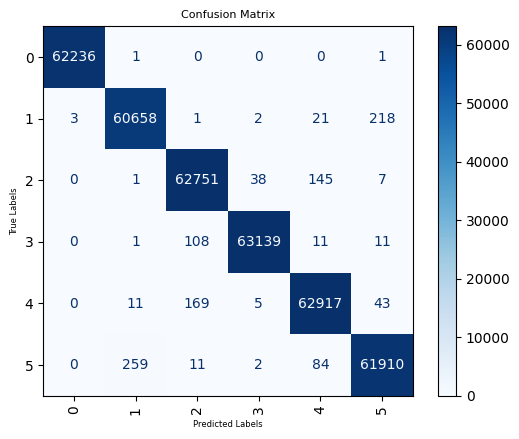

KNN:  5
Accuracy:  0.9967632963678476
F1-score:  0.9967584602457232
Precision:  0.9967602618141379
Recall:  0.9967569188399565


<Figure size 300x300 with 0 Axes>

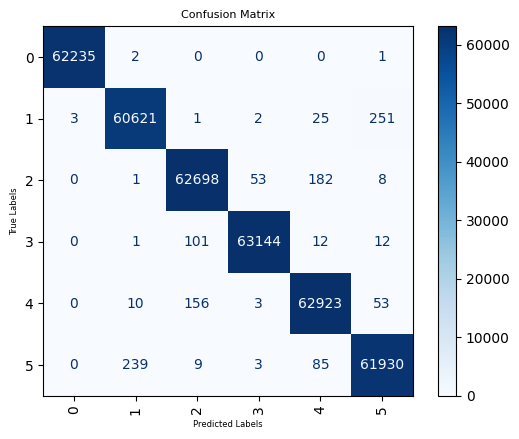

KNN:  6
Accuracy:  0.9964697783138188
F1-score:  0.9964653785214761
Precision:  0.9964663650184508
Recall:  0.9964649687592635


<Figure size 300x300 with 0 Axes>

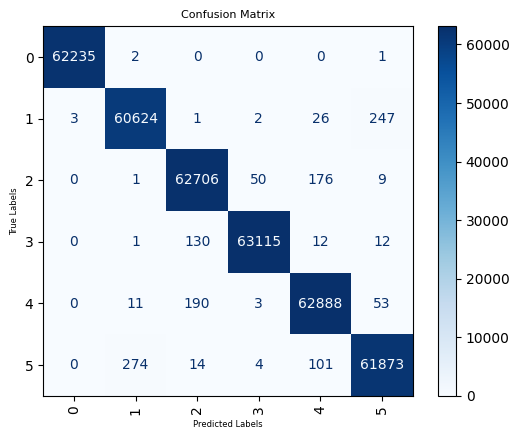

In [14]:
from sklearn.neighbors import KNeighborsClassifier

def Classifier(clf,x_train,y_train,x_test,y_test):

    #fit the model
    model = clf.fit(x_train, y_train)

    #predict on the test set
    y_pred = clf.predict(x_test)

    # print the scores
    print("Accuracy: ", str(accuracy_score(y_test, y_pred)))
    print("F1-score: ", str(f1_score(y_test, y_pred, average='macro')))
    print("Precision: ", str(precision_score(y_test, y_pred, average='macro')))
    print("Recall: ", str(recall_score(y_test, y_pred, average='macro')))
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(3, 3))  # Adjust the figure size

    # Plot the confusion matrix with smaller text
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  # You can also rotate x-ticks if necessary

    # Adjust text sizes for labels and titles
    plt.title('Confusion Matrix', fontsize=8)  # Adjust title font size
    plt.xlabel('Predicted Labels', fontsize=6)  # Adjust x-axis label font size
    plt.ylabel('True Labels', fontsize=6)       # Adjust y-axis label font size

    # Display the plot
    plt.show()



for neighbors in [4, 5, 6] :
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    # print("KNN: ", + "Neighbors: " + str(neighbors))
    print("KNN: ", neighbors)
    Classifier(knn, X_train_mc, y_train_mc, X_test_mc, y_test_mc)

c:\Users\siddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.8478326551221825
0.8700115272544855


<Figure size 300x300 with 0 Axes>

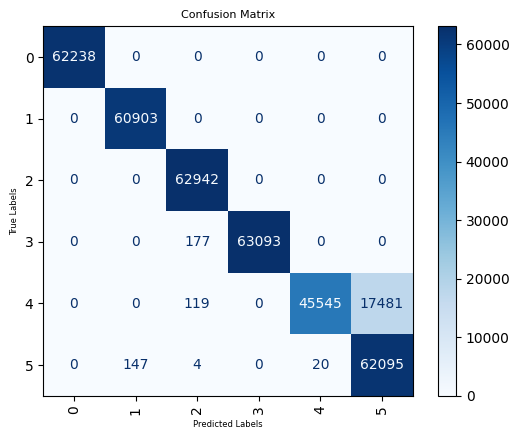

In [15]:
svc1=SVC(C=100,kernel='poly',gamma=0.1,decision_function_shape='ovo',max_iter=1000)
svc1.fit(X_train_mc,y_train_mc)
y_test_pred=svc1.predict(X_test_mc)
# save the f1_score that used y_test and y_pred in y
y=f1_score(y_test_mc,y_test_pred,average='macro') 
# creat confusion matrix of the result
#x=confusion_matrix(y_test_mc,y_test_pred)
# calculate the accuracy and store it in a
a=accuracy_score(y_test_mc,y_test_pred)
# Print the result of SVM model
print(y)
#print(x)
print(a)

plt.figure(figsize=(3, 3))  # Adjust the figure size

# Plot the confusion matrix with smaller text
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  # You can also rotate x-ticks if necessary

# Adjust text sizes for labels and titles
plt.title('Confusion Matrix', fontsize=8)  # Adjust title font size
plt.xlabel('Predicted Labels', fontsize=6)  # Adjust x-axis label font size
plt.ylabel('True Labels', fontsize=6)       # Adjust y-axis label font size

# Display the plot
plt.show()